<a href="https://colab.research.google.com/github/rahulkashyap14298/about-us/blob/master/Notebo0k2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In This notebook we will be training our dataset  on our taining model.

We will be first uploading our kaggle.json file on kaggle

In [ ]:
from google.colab import files
my_file=files.upload()

Saving kaggle.json to kaggle.json


Now we will be importing os and pandas library and setting the environment variable and downloading our kaggle dataset and unzipping the file 

In [ ]:
import os
import pandas as pd
cred = pd.read_json("kaggle.json",lines=True)
os.environ['KAGGLE_USERNAME'] = cred.iloc[0][0]
os.environ['KAGGLE_KEY'] = cred.iloc[0][1]

In [ ]:
!kaggle datasets download -d rahulkashyap14298/electronic-items

 59% 9.00M/15.3M [00:00<00:00, 18.9MB/s]
100% 15.3M/15.3M [00:00<00:00, 24.0MB/s]


In [ ]:
!unzip "*.zip"

Archive:  electronic-items.zip
  inflating: my_data/fan/00000000.jpg  
  inflating: my_data/fan/00000001.jpg  
  inflating: my_data/fan/00000002.jpg  
  inflating: my_data/fan/00000003.jpg  
  inflating: my_data/fan/00000004.jpg  
  inflating: my_data/fan/00000005.jpg  
  inflating: my_data/fan/00000006.jpg  
  inflating: my_data/fan/00000007.jpg  
  inflating: my_data/fan/00000008.jpg  
  inflating: my_data/fan/00000009.jpg  
  inflating: my_data/fan/00000010.jpg  
  inflating: my_data/fan/00000011.jpg  
  inflating: my_data/fan/00000012.jpg  
  inflating: my_data/fan/00000013.jpg  
  inflating: my_data/fan/00000014.jpg  
  inflating: my_data/fan/00000015.jpg  
  inflating: my_data/fan/00000016.jpg  
  inflating: my_data/fan/00000017.jpg  
  inflating: my_data/fan/00000018.jpg  
  inflating: my_data/fan/00000019.jpg  
  inflating: my_data/fan/00000020.jpg  
  inflating: my_data/fan/00000021.jpg  
  inflating: my_data/fan/00000022.jpg  
  inflating: my_data/fan/00000023.jpg  
  inflati

Now we will be importing required libraries and listing the required files and we will be using folder structure to store our images dataset and using resnet50 trained model 

In [ ]:
os.listdir("my_data")

['juicer', 'laptop', 'geyser', 'refrigerator', 'fan']

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *
from fastai.metrics import error_rate
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
bs=64

We will  be giving using image data bunch function and passing get transform function and setting its value to be true for doing data augmentation. 

In [ ]:
path=""
tfms = get_transforms(do_flip=True)
data = ImageDataBunch.from_folder( Path("my_data"), valid_pct=0.2, bs=64, size=224, ds_tfms=get_transforms())

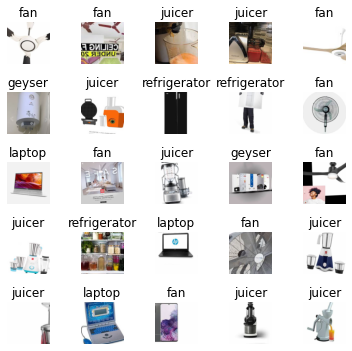

In [ ]:
data.show_batch(rows=5, figsize=(5,5))

printing the dataset and length of catogries 


In [ ]:
print(data.classes)
len(data.classes)

['fan', 'geyser', 'juicer', 'laptop', 'refrigerator']


5

In [ ]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


Training our model for 4 epochs on our dataset 

In [ ]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,1.019904,0.491292,0.897674,00:21
1,0.685840,0.435520,0.890698,00:19
2,0.509902,0.356967,0.890698,00:19
3,0.375876,0.322119,0.906977,00:19


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

Mounting the google drive

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
os.makedirs("/content/drive/My Drive/electronic-research/electronic-recognition",exist_ok=True)

In [ ]:
my_dir="/content/drive/My Drive/electronic-research/electronic-recognition"

Now saving or model so that if runtime expire we wouldn't have to train our model again

In [ ]:
learn.save(my_dir+"/Stage-1")

In [ ]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,accuracy,time
0,0.233102,0.338424,0.897674,00:20
1,0.208560,0.329250,0.879070,00:20


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

Now we will be unfreezing all the layers and start the training model again for 3 cycles .

In [ ]:
learn.unfreeze()


In [ ]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.270325,0.508509,0.855814,00:22
1,0.292750,0.442488,0.872093,00:23
2,0.228961,0.273896,0.911628,00:23


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

In [ ]:
learn.load("/content/drive/My Drive/electronic-research/electronic-recognition/Stage-1")

Learner(data=ImageDataBunch;

Train: LabelList (1721 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
juicer,juicer,juicer,juicer,juicer
Path: my_data;

Valid: LabelList (430 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
refrigerator,fan,juicer,laptop,laptop
Path: my_data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

Saving the export.pkl in google drive.

In [ ]:
learn.export(my_dir+"/export.pkl")

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

In [ ]:
import warnings
warnings.filterwarnings("ignore")

Plotting the most confused values of our train dataset

In [ ]:
interp.most_confused(min_val=2)

[('fan', 'geyser', 9),
 ('juicer', 'geyser', 4),
 ('fan', 'juicer', 3),
 ('geyser', 'laptop', 3),
 ('geyser', 'refrigerator', 3),
 ('geyser', 'fan', 2),
 ('juicer', 'refrigerator', 2),
 ('laptop', 'fan', 2),
 ('laptop', 'juicer', 2),
 ('refrigerator', 'laptop', 2)]